In [12]:
import os
img_dir = '/Users/User/303/creator_camp/'
categoris = os.listdir(img_dir)
nb_categoris = len(categoris)

In [13]:
import tensorflow as tf
import tensorflow.keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image
import cv2

In [14]:
import glob

data = []
labels = []
for i in range(1) :
    a = glob.glob(img_dir+'/'+categoris[i]+'/*')
    for j in a :
        image=tensorflow.keras.preprocessing.image.load_img(j, color_mode='rgb')
        image=np.array(image)
        data.append(image)
        labels.append(i)

In [15]:
print(a)

['/Users/User/303/creator_camp//L2_10\\aamhfbsxjoqkqsxnnpoy.jpg', '/Users/User/303/creator_camp//L2_10\\aatdcomdixgejmiibsft.jpg', '/Users/User/303/creator_camp//L2_10\\aatmmprdzkzdkbfcslkx.jpg', '/Users/User/303/creator_camp//L2_10\\abaoovbyxzqodvhoasko.jpg', '/Users/User/303/creator_camp//L2_10\\abymagsohyagiheolkhk.jpg', '/Users/User/303/creator_camp//L2_10\\abzsvhshnhwujgwfyphe.jpg', '/Users/User/303/creator_camp//L2_10\\abzvzrtojegizjimyntg.jpg', '/Users/User/303/creator_camp//L2_10\\acqylihnzmuhgsunsiql.jpg', '/Users/User/303/creator_camp//L2_10\\actkjeagmzwopnoewwxo.jpg', '/Users/User/303/creator_camp//L2_10\\adexiemcbuovefubehxd.jpg', '/Users/User/303/creator_camp//L2_10\\adifywyfmtduwlbotdky.jpg', '/Users/User/303/creator_camp//L2_10\\adketuwinjndjaqrrzho.jpg', '/Users/User/303/creator_camp//L2_10\\adktajhgfxnovqziuvkp.jpg', '/Users/User/303/creator_camp//L2_10\\adqgcyopecgxiqvcswgx.jpg', '/Users/User/303/creator_camp//L2_10\\adzihlnlmguqfbmnlexu.jpg', '/Users/User/303/creator

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


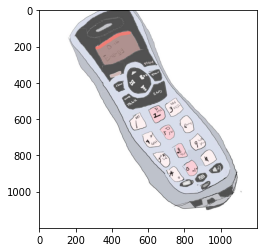

In [20]:
img=data[0]
print(img)
plt.imshow(img)

In [4]:
#type(labels)

In [5]:
# y=np.array(labels)
# y[201]

In [6]:
print(categoris)

['가자미전', '간장게장', '감자탕', '거봉포도', '고구마', '고구마맛탕', '고등어찌개', '곱창구이', '군만두', '굴전', '김치찌개', '깻잎나물볶음', '꼬리곰탕', '꽈리고추무침', '나시고랭', '누룽지', '단무지', '달걀말이', '달걀볶음밥', '달걀비빔밥', '닭가슴살', '닭개장', '닭살채소볶음', '닭칼국수', '도가니탕', '도토리묵', '돼지감자', '돼지고기구이', '두부', '두부고추장조림', '딸기', '떡갈비', '떡국', '레드와인', '마늘쫑무침', '마카롱', '매운탕', '미소된장국', '미소장국', '미역초무침', '바나나우유', '바지락조개국', '보리밥', '불고기', '비빔밥', '뼈해장국', '삼선자장면', '새우매운탕', '새우볶음밥', '생연어']


In [7]:
# X = np.array(data)
# #labels = np.array(labels)
# #labels = pd.get_dummies(labels)

# print(X.shape)
# print(y.shape)

In [8]:
labels=np.load('labels.npy')
data=np.load('data.npy')

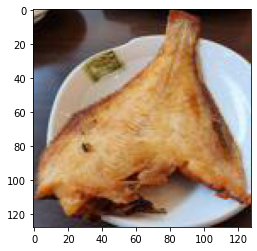

In [9]:
img=data[0]
plt.imshow(img)

In [10]:
data=np.load("data.npy")
data=data/255.0

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D,BatchNormalization,MaxPooling2D,Flatten
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [12]:
k=5
kfold=KFold(n_splits=k,shuffle=True,random_state = 5)

In [13]:
acc_score=[]

In [14]:
def model_fn():
    model=Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),
                     activation='relu',
                     padding='same',
                     input_shape=(128,128,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16,kernel_size=(3,3), activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(50,activation='softmax'))
    return model

In [15]:
model=model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                        

In [16]:
for train_index,test_index in kfold.split(data):
#     X_train,X_test=X[train_index:],X[test_index:]
#     y_train,y_test=y[train_index],y[test_index]
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    model=model_fn()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history=model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)
    accuracy=model.evaluate(X_test,y_test)[1]
    accuracy_score.append(accuracy)

Epoch 1/100
250/250 [==============================] - 13s 10ms/step - loss: 2.6911 - accuracy: 0.2673
Epoch 2/100
250/250 [==============================] - 3s 10ms/step - loss: 1.8977 - accuracy: 0.4487
Epoch 3/100
250/250 [==============================] - 2s 10ms/step - loss: 1.5481 - accuracy: 0.5276
Epoch 4/100
250/250 [==============================] - 3s 10ms/step - loss: 1.2595 - accuracy: 0.6120
Epoch 5/100
250/250 [==============================] - 2s 10ms/step - loss: 1.0038 - accuracy: 0.6864
Epoch 6/100
250/250 [==============================] - 2s 10ms/step - loss: 0.7617 - accuracy: 0.7544
Epoch 7/100
250/250 [==============================] - 2s 10ms/step - loss: 0.5367 - accuracy: 0.8281
Epoch 8/100
250/250 [==============================] - 3s 10ms/step - loss: 0.3735 - accuracy: 0.8790
Epoch 9/100
250/250 [==============================] - 2s 10ms/step - loss: 0.3003 - accuracy: 0.9013
Epoch 10/100
250/250 [==============================] - 2s 10ms/step - loss: 0.22

KeyboardInterrupt: 

In [ ]:
avg_acc_score=sum(accuracy_score)/k
print('정확도:',accuracy_score)
print('정확도 평균',avg_acc_score)